<a href="https://colab.research.google.com/github/SaraKarim23/PART_3-RHESSI-Mission-Data-to-Identify-Solar-Flare/blob/main/PART_3_RHESSI_Mission_Data_to_Identify_Solar_Flare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Sunspots - Mapping Flares on the Sun**
Filtering data - removing flares having attributes null or NaN values

In [ ]:
'''Filtering data based on the energy range 3-6 KeV, flags and radial values. Filtering possible values
    which may be wrong or without any solar event '''

def filter_data(DATA,lwrong):
    ## filter 1: 3-6 kev
    lenght1 = len(DATA)
    DATA = DATA[DATA['energy.kev']!='3-6']
    lenght2 = len(DATA)
    if lenght1!=lenght2:
        print('filtering 3-6 kev energy range',lenght1,lenght2)

    ## filter 2: radial
    radial = DATA['radial'].values
    lenght1 = len(DATA)
    DATA = DATA[DATA['radial']<=np.percentile(radial,99)]
    lenght2 = len(DATA)
    if lenght1!=lenght2:
        print('filtering radial',lenght1,lenght2)

    # filter possible wrong values or without solar event
    #lwrong = ['NS','SD','SS','DF','DR','ED','ES','FE','FR','FS','GD','GE','GS','MR','P0','PS','PE']
    for icod in lwrong:
        ## filter
        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.1']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.2']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.3']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.4']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        values = DATA['flag.5'].values
        lfilter = [i for i in list(values[pd.notnull(values)]) if icod in i]
        DATA = DATA[~DATA['flag.5'].isin(lfilter)]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

    return DATA

In [ ]:
""" Reading dataset and filtering values based on above parameters of the function"""
data = pd.read_csv('/content/drive/MyDrive/MSc/Solar /hessi.solar.flare.2002to2016.csv', sep=',')
# filtering basic
lwrong = ['NS','SD']
filtered_data = filter_data(data,lwrong)

# include energy bounday ranges
filtered_data['energy.kev.i'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[0]))
filtered_data['energy.kev.f'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[1]))

CENERGY = filtered_data[['energy.kev','energy.kev.i','energy.kev.f']].drop_duplicates(inplace=False).sort_values(['energy.kev.i'], ascending=[1], inplace=False)

filtering 3-6 kev energy range 113942 107606
filtering radial 107606 106537
filtering SD 106537 106501
filtering SD 106501 106408


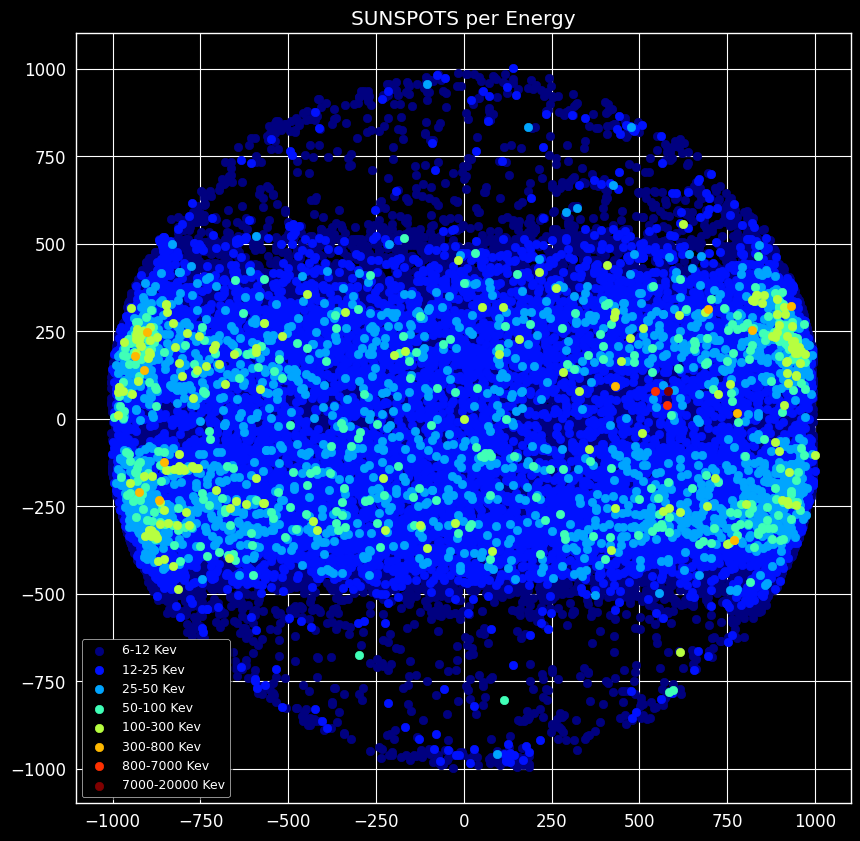

In [ ]:
'''Plotting all the Flares from the filtered dataframe'''

colors = plt.cm.jet(np.linspace(0,1,len(CENERGY['energy.kev.i'].values)))

# build figure object
fig, ax = plt.subplots(figsize=(10,10))
# loop over energy ranges
for i,irange in enumerate(CENERGY['energy.kev'].values):
    # collect filtered data in temporary dataset
    AUX_data = filtered_data[filtered_data['energy.kev']==irange][['x.pos.asec','y.pos.asec']]
    # scatter plot to plot flare
    plt.scatter(AUX_data['x.pos.asec'].values,AUX_data['y.pos.asec'].values,color=colors[i],label='%s Kev'%irange)
    ax.legend(loc='best',fontsize=9,shadow=True)
    # delete auxillary/temporary dataset
    del(AUX_data)
# set title to plot
plt.title('SUNSPOTS per Energy')
# plot
plt.show()

### **Flare position in the Sun arcsec from the center**

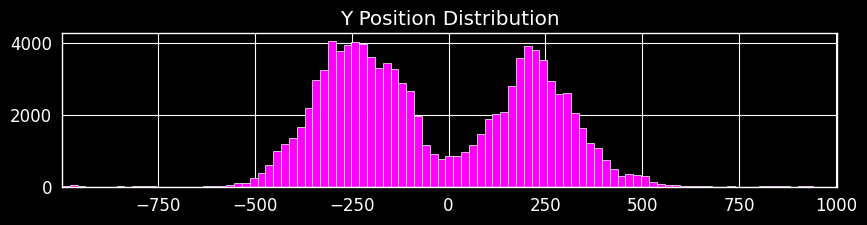

In [ ]:
'''Y position distriution arounf the center of the sun'''
fig, ax = plt.subplots(figsize=(10,2))
# hist
y = filtered_data['y.pos.asec'].values
plt.hist(y, bins=np.linspace(np.min(y),np.max(y),100), label="label var y", color='magenta')
# set limits
ax.set_xlim([np.min(y),np.max(y)])
# title
plt.title('Y Position Distribution')
# plot
plt.show()


# **Yearly analysis of Flares**


<Axes: title={'center': 'YEARLY NUMBER OF EVENTS'}, xlabel='year'>

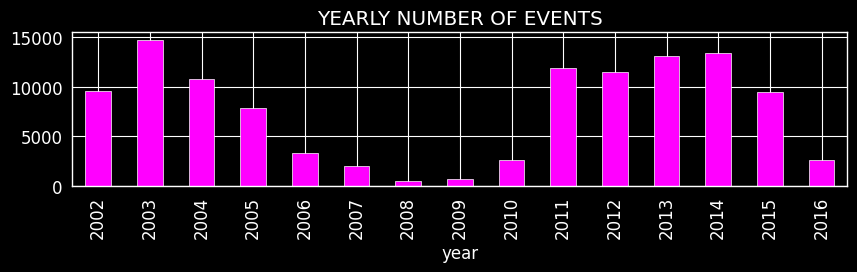

In [ ]:
""" Number of events per year """
plt.style.use('dark_background')
new_df.groupby(['year'])['total_counts'].count().plot(kind='bar',figsize=(10,2),title='YEARLY NUMBER OF EVENTS', color='magenta')


# **Mapping solar flares intensity over the years**


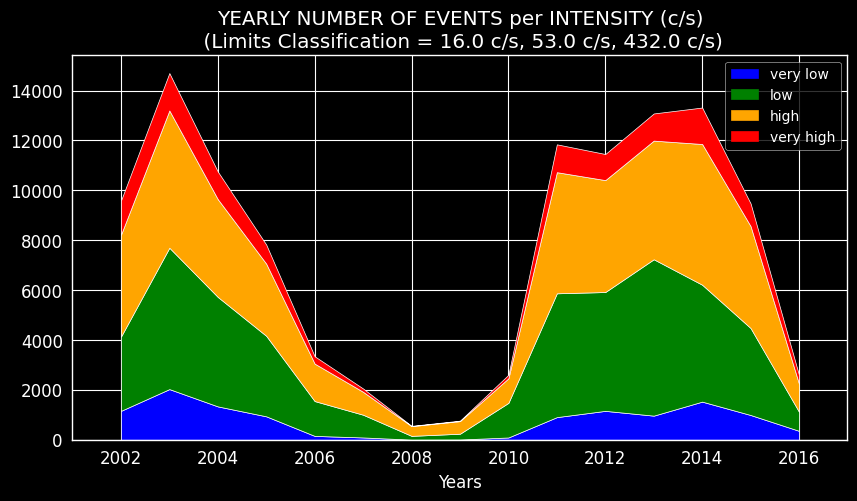

In [ ]:
""" Number of events per year and intensity ranges """

# calculate limits of intensity ranges
intensity = new_df['peak_c_s'].values
p10 = np.percentile(intensity,10)
p50 = np.percentile(intensity,50)
p90 = np.percentile(intensity,90)

# plot average of events intensity per year
PI0 = new_df[(new_df['peak_c_s']<=p10)].groupby(['year'])['peak_c_s'].count()
PI1 = new_df[(new_df['peak_c_s']>p10) & (new_df['peak_c_s']<=p50)].groupby(['year'])['peak_c_s'].count()
PI2 = new_df[(new_df['peak_c_s']>p50) & (new_df['peak_c_s']<=p90)].groupby(['year'])['peak_c_s'].count()
PI3 = new_df[(new_df['peak_c_s']>p90)].groupby(['year'])['peak_c_s'].count()
PI = pd.DataFrame({'year':PI0.index.values,'very low':PI0.values,'low':PI1.values,'high':PI2.values,'very high':PI3.values})

import matplotlib.patches as mpatches
# build figure object
fig, ax = plt.subplots(figsize=(10,5))

# collect data
ind = PI0.index.values
y0 = PI0.values
y1 = PI1.values
y2 = PI2.values
y3 = PI3.values
# plot
ax.stackplot(ind, y0, y1, y2, y3, colors=['blue','green','orange','red'])
# set limits
ax.set_xlim([ind[0]-1,ind[-1]+1])
# set legend
ax.legend([mpatches.Patch(color='blue'),
            mpatches.Patch(color='green'),
            mpatches.Patch(color='orange'),
            mpatches.Patch(color='red')],
           ['very low','low','high','very high'])

# set label
ax.set_xlabel('Years')
# set title
ax.set_title('YEARLY NUMBER OF EVENTS per INTENSITY (c/s)\n (Limits Classification = %s c/s, %s c/s, %s c/s)'%(p10,p50,p90))
# plot
plt.show()

## **Number of solar flares per year**

 The solar cycle or solar magnetic activity cycle is the nearly periodic 11-year change in the Sun's activity (including changes in the levels of solar radiation and ejection of solar material) and appearance (changes in the number and size of sunspots, flares, and other manifestations).

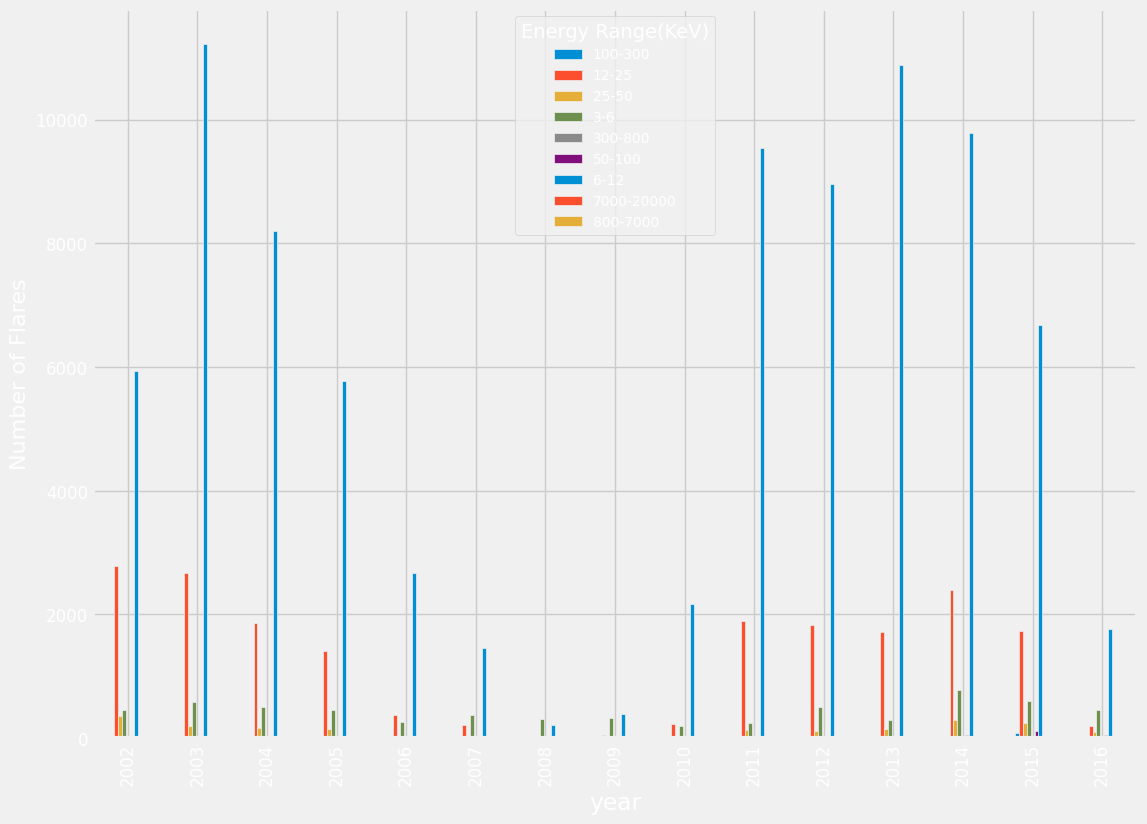

In [ ]:
plt.style.use('fivethirtyeight')
new_df.groupby(['year'])['energy_kev'].value_counts().unstack().plot(kind='bar')
plt.ylabel('Number of Flares', fontsize=16)
plt.legend(title='Energy Range(KeV)', loc='best', prop={'size': 10})

## **11 Year cycle confirmed for all energies from the above barplot**
